## Simple Level-1 Workflow with normal functions

In [1]:
def func3(input3):
    return input3 + ": This is the input from function 3"

In [2]:
def func1(input1):
    return input1 + ": This is the input from function 1"

In [3]:
def func2(input2):
    output = func3("This is function 2 in between")
    return input2 + " " + output + ": This is the input from function 2"

In [4]:
from langgraph.graph import Graph

In [5]:
workflow1 = Graph()

In [6]:
workflow1.add_node("function1", func1)

In [7]:
workflow1.add_node("function2", func2)

In [8]:
workflow1.add_edge("function1","function2")

In [9]:
workflow1.set_entry_point("function1")

In [10]:
workflow1.set_finish_point("function2")

In [11]:
app1 = workflow1.compile()

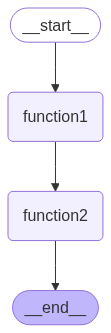

In [12]:
from IPython.display import Image, display

try:
    display(Image(app1.get_graph().draw_mermaid_png()))
except Exception as e:
    # This requires some extra dependencies and is optional
    print(e)

In [13]:
app1.invoke("Hello I am Atharva")

'Hello I am Atharva: This is the input from function 1 This is function 2 in between: This is the input from function 3: This is the input from function 2'

In [14]:
input = "Hello I am Atharva"

In [15]:
for output in app1.stream(input):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from function1
_______
Hello I am Atharva: This is the input from function 1


here is output from function2
_______
Hello I am Atharva: This is the input from function 1 This is function 2 in between: This is the input from function 3: This is the input from function 2




## Let's create a new workflow with LLMs

In [16]:
import os

In [17]:
from dotenv import load_dotenv
load_dotenv()

True

In [18]:
GOOGLE_API_KEY = os.getenv("GOOGLE_API_KEY")
TAVILY_API_KEY = os.getenv("TAVILY_API_KEY")
GROQ_API_KEY = os.getenv("GROQ_API_KEY")
LANGCHAIN_API_KEY = os.getenv("LANGCHAIN_API_KEY")
LANGSMITH_PROJECT = os.getenv("LANGSMITH_PROJECT")
HUGGINGFACE_API_KEY = os.getenv("HUGGINGFACE_API_KEY")
SERPER_API_KEY = os.getenv("SERPER_API_KEY")

os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY
os.environ["TAVILY_API_KEY"] = TAVILY_API_KEY
os.environ["GROQ_API_KEY"] = GROQ_API_KEY
os.environ["LANGCHAIN_API_KEY"] = LANGCHAIN_API_KEY
os.environ["LANGSMITH_PROJECT"] = LANGSMITH_PROJECT
os.environ["HUGGINGFACE_API_KEY"] = HUGGINGFACE_API_KEY
os.environ["SERPER_API_KEY"] = SERPER_API_KEY

In [19]:
from langchain_groq import ChatGroq

open_llm = ChatGroq(model_name = "llama-3.3-70b-versatile")

In [21]:
open_llm.invoke("Hello")

AIMessage(content='Hello. How can I help you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 36, 'total_tokens': 46, 'completion_time': 0.017003042, 'prompt_time': 0.010303153, 'queue_time': 0.212717363, 'total_time': 0.027306195}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_6507bcfb6f', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--10ba21ca-b758-4c14-99f4-27350ca52429-0', usage_metadata={'input_tokens': 36, 'output_tokens': 10, 'total_tokens': 46})

In [22]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings
embeddings = GoogleGenerativeAIEmbeddings(model = "models/embedding-gecko-001")

In [23]:
def function1(input):
    open_llm = ChatGroq(model_name = "llama-3.3-70b-versatile")
    response = open_llm.invoke(input).content
    return response